<a href="https://colab.research.google.com/github/sitthatkaja/DPDM2023/blob/main/Frequent_Patterns_(Association_Rules).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frequent Patterns

เชื่อว่าแต่ละการกระทำจะมี Pattern ให้เห็นเป็นรูปธรรม

In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/DPDM23_DATA'

Mounted at /content/drive


## Import ข้อมูล

In [3]:
data = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin-1')

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [5]:
data.groupby('InvoiceNo').max()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
InvoiceNo,,,,,,,
536365,85123A,WHITE METAL LANTERN,8,12/01/2010 08:26,7.65,17850.0,United Kingdom
536366,22633,HAND WARMER UNION JACK,6,12/01/2010 08:28,1.85,17850.0,United Kingdom
536367,84969,RECIPE BOX WITH METAL HEART,32,12/01/2010 08:34,9.95,13047.0,United Kingdom
536368,22960,YELLOW COAT RACK PARIS FASHION,6,12/01/2010 08:34,4.95,13047.0,United Kingdom
536369,21756,BATH BUILDING BLOCK WORD,3,12/01/2010 08:35,5.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...
C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/09/2011 09:27,2.08,16446.0,United Kingdom
C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/09/2011 09:57,1.95,14397.0,United Kingdom
C581499,M,Manual,-1,12/09/2011 10:28,224.69,15498.0,United Kingdom


In [6]:
data.groupby('StockCode').max()

<ipython-input-6-7f62bde03018>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  data.groupby('StockCode').max()


,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
StockCode,,,,,,
10002,551429,180,4/28/2011 15:05,1.66,18079.0,United Kingdom
10080,577801,170,9/27/2011 9:24,0.85,18096.0,United Kingdom
10120,580502,30,9/28/2011 15:18,0.21,18043.0,United Kingdom
10123C,560213,3,7/15/2011 15:05,0.65,17967.0,United Kingdom
10123G,549349,-38,04/08/2011 11:13,0.00,NaN,United Kingdom
...,...,...,...,...,...,...
gift_0001_20,573585,10,6/24/2011 15:51,17.02,NaN,United Kingdom
gift_0001_30,565231,30,8/30/2011 10:48,25.53,NaN,United Kingdom
gift_0001_40,561513,1,7/27/2011 15:12,34.04,NaN,United Kingdom


In [7]:
data.groupby('InvoiceNo')['StockCode'].apply(list)

InvoiceNo
536365     [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
536366                                        [22633, 22632]
536367     [84879, 22745, 22748, 22749, 22310, 84969, 226...
536368                          [22960, 22913, 22912, 22914]
536369                                               [21756]
                                 ...                        
C581484                                              [23843]
C581490                                       [22178, 23144]
C581499                                                  [M]
C581568                                              [21258]
C581569                                       [84978, 20979]
Name: StockCode, Length: 25900, dtype: object

In [8]:
transactions = data.groupby('InvoiceNo')['StockCode'].apply(list)

## ทำ Association Rules

Association rules เป็นเทคนิคในการวิเคราะห์ข้อมูลที่ใช้ในการค้นหาความสัมพันธ์หรือความเชื่อมโยงระหว่างสิ่งของในชุดข้อมูล เช่น ทางซื้อ A จะซื้อ B ด้วย

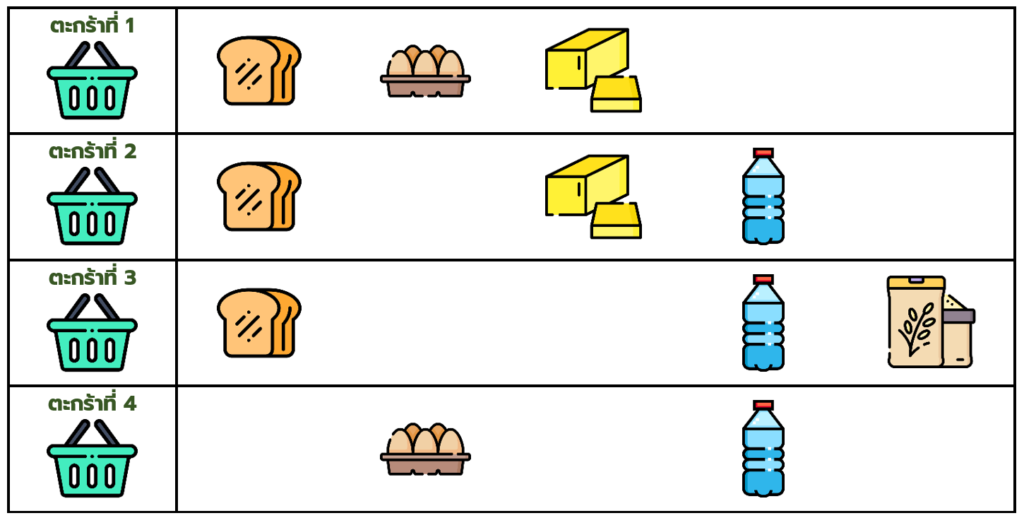

In [9]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=4b140138d4104e686274e4ab823260e7059b37b6807cc9b4398b0cbf707e1c3a
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [10]:
from apyori import apriori

In [11]:
frequentItemsets = list(apriori(transactions,min_support = 0.065))
frequentItemsets

[RelationRecord(items=frozenset({'22423'}), support=0.08386100386100385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22423'}), confidence=0.08386100386100385, lift=1.0)]),
 RelationRecord(items=frozenset({'47566'}), support=0.06586872586872587, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'47566'}), confidence=0.06586872586872587, lift=1.0)]),
 RelationRecord(items=frozenset({'85099B'}), support=0.08243243243243244, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85099B'}), confidence=0.08243243243243244, lift=1.0)]),
 RelationRecord(items=frozenset({'85123A'}), support=0.08671814671814672, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85123A'}), confidence=0.08671814671814672, lift=1.0)])]

In [12]:
len(frequentItemsets)

4

In [13]:
frequentItemsets[0][0]

frozenset({'22423'})

In [14]:
frequentItemsets[0][0].__len__()

1

In [15]:
min_sup = 0.03

frequentItemsets = list(apriori(transactions,min_support = min_sup))
for i in frequentItemsets:
  if i[0].__len__()>1:
    print('yes')
    print(i)

yes
RelationRecord(items=frozenset({'22386', '85099B'}), support=0.03216216216216216, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22386', '85099B'}), confidence=0.03216216216216216, lift=1.0), OrderedStatistic(items_base=frozenset({'22386'}), items_add=frozenset({'85099B'}), confidence=0.6766856214459789, lift=8.20897311262335), OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'22386'}), confidence=0.39016393442622943, lift=8.20897311262335)])
yes
RelationRecord(items=frozenset({'22697', '22699'}), support=0.03027027027027027, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22697', '22699'}), confidence=0.03027027027027027, lift=1.0), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7417218543046358, lift=17.1523178807947), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7, lift=17.1523178807947)])


#Example

`RelationRecord(items=frozenset({'85099B', '22386'}), `

support=0.03216216216216216,

- ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85099B', '22386'}), confidence=0.03216216216216216, lift=1.0),

- OrderedStatistic(items_base=frozenset({'22386'}), items_add=frozenset({'85099B'}), confidence=0.6766856214459789, lift=8.20897311262335),

- OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'22386'}), confidence=0.39016393442622943, lift=8.20897311262335)])





In [16]:
data[data['StockCode'] == "85099B"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,12/01/2010 09:57,1.65,16029.0,United Kingdom
234,536390,85099B,JUMBO BAG RED RETROSPOT,100,12/01/2010 10:19,1.65,17511.0,United Kingdom
533,536409,85099B,JUMBO BAG RED RETROSPOT,2,12/01/2010 11:45,1.95,17908.0,United Kingdom
790,536464,85099B,JUMBO BAG RED RETROSPOT,1,12/01/2010 12:23,1.95,17968.0,United Kingdom
1069,536522,85099B,JUMBO BAG RED RETROSPOT,1,12/01/2010 12:49,1.95,15012.0,United Kingdom
...,...,...,...,...,...,...,...,...
538603,581412,85099B,JUMBO BAG RED RETROSPOT,3,12/08/2011 14:38,2.08,14415.0,United Kingdom
538913,581421,85099B,JUMBO BAG RED RETROSPOT,9,12/08/2011 15:23,2.08,15898.0,United Kingdom
539338,581439,85099B,JUMBO BAG RED RETROSPOT,1,12/08/2011 16:30,4.13,NaN,United Kingdom
540434,581486,85099B,JUMBO BAG RED RETROSPOT,10,12/09/2011 09:38,2.08,17001.0,United Kingdom


RelationRecord(items=frozenset({'22699', '22697'}),

support=0.03027027027027027

- , ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.03027027027027027, lift=1.0),

- OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7417218543046358, lift=17.1523178807947),


- OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7, lift=17.1523178807947)])


In [17]:
data[(data['StockCode'] == "22699") | (data['StockCode'] == "'22697")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1077,536523,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/01/2010 12:50,2.95,12868.0,United Kingdom
1193,536530,22699,ROSES REGENCY TEACUP AND SAUCER,4,12/01/2010 13:21,2.95,17905.0,United Kingdom
1645,536544,22699,ROSES REGENCY TEACUP AND SAUCER,2,12/01/2010 14:32,5.91,NaN,United Kingdom
2794,536592,22699,ROSES REGENCY TEACUP AND SAUCER,4,12/01/2010 17:06,5.91,NaN,United Kingdom
3397,536624,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/02/2010 10:45,2.95,13418.0,United Kingdom
...,...,...,...,...,...,...,...,...
539671,581439,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/08/2011 16:30,5.79,NaN,United Kingdom
540213,581472,22699,ROSES REGENCY TEACUP AND SAUCER,12,12/08/2011 19:55,2.95,15796.0,United Kingdom
540986,581492,22699,ROSES REGENCY TEACUP AND SAUCER,2,12/09/2011 10:03,5.79,NaN,United Kingdom
541218,581495,22699,ROSES REGENCY TEACUP AND SAUCER,12,12/09/2011 10:20,2.95,14051.0,United Kingdom


In [18]:
data[(data['StockCode'] == "22699") | (data['StockCode'] == "'22697")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1077,536523,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/01/2010 12:50,2.95,12868.0,United Kingdom
1193,536530,22699,ROSES REGENCY TEACUP AND SAUCER,4,12/01/2010 13:21,2.95,17905.0,United Kingdom
1645,536544,22699,ROSES REGENCY TEACUP AND SAUCER,2,12/01/2010 14:32,5.91,NaN,United Kingdom
2794,536592,22699,ROSES REGENCY TEACUP AND SAUCER,4,12/01/2010 17:06,5.91,NaN,United Kingdom
3397,536624,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/02/2010 10:45,2.95,13418.0,United Kingdom
...,...,...,...,...,...,...,...,...
539671,581439,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/08/2011 16:30,5.79,NaN,United Kingdom
540213,581472,22699,ROSES REGENCY TEACUP AND SAUCER,12,12/08/2011 19:55,2.95,15796.0,United Kingdom
540986,581492,22699,ROSES REGENCY TEACUP AND SAUCER,2,12/09/2011 10:03,5.79,NaN,United Kingdom
541218,581495,22699,ROSES REGENCY TEACUP AND SAUCER,12,12/09/2011 10:20,2.95,14051.0,United Kingdom
